In [3]:
import pandas as pd
import numpy as np

In [15]:
def read_excel(path="./data.xlsx"):
    data_xls = pd.io.excel.ExcelFile(path)
    data={}
    print(data_xls.sheet_names)
    for name in data_xls.sheet_names:
        df=pd.read_excel(data_xls,sheet_name=name)
        data[name]=df
        # print(name, " : df = ",df , type(df))
        if df.empty:
            continue
    return data

data = read_excel()
data

['驾驶员基本信息', '工作时长', '服务违章', '安全违章', '安全事故']


{'驾驶员基本信息':          员工编号 性别   分公司       出生日期      学历       入职日期      初领证日期
 0    20090587  男  七分公司 1973-09-05  高中（普高） 2009-07-02 2002-07-01
 1    20150102  男  七分公司 1986-06-09      中专 2015-05-01 2006-10-11
 2    20150222  男  七分公司 1991-06-09      中专 2015-08-04 2011-10-25
 3    20130164  男  七分公司 1975-03-10      本科 2013-12-05 2003-12-19
 4    20151288  男  七分公司 1986-11-28     NaN 2013-09-10 2011-04-22
 ..        ... ..   ...        ...     ...        ...        ...
 439  20150099  男  七分公司 1976-06-15      中专 2015-05-01        NaT
 440  20150372  男  七分公司 1982-01-15     NaN 2011-07-07        NaT
 441  20151285  男  七分公司 1974-08-11     NaN 2001-09-01        NaT
 442  20180098  男  七分公司 1994-10-07      中专 2018-05-18        NaT
 443  20200056  女  七分公司 1996-03-12      本科 2020-08-01        NaT
 
 [444 rows x 7 columns],
 '工作时长':            员工编号       开班日期      开班时间       收班日期      收班时间  工作时长（小时）  驾车时长（小时）   
 0      20151123 2022-04-01  04:36:54 2022-04-01  18:51:38     12.42      9.42  \
 1      20

In [16]:
pinformation = data["驾驶员基本信息"]
pwork = data["工作时长"]
service_violation = data["服务违章"]
safety_violation = data["安全违章"]
safety_accident = data["安全事故"]

In [17]:
# pinformation
# 男 - 1 ； 女 - 0
pinformation["性别"].value_counts()
pinformation.loc[pinformation["性别"]=='男' , '性别']=1
pinformation.loc[pinformation["性别"]=='女' , '性别']=0
pinformation

员工编号 性别   分公司       出生日期      学历       入职日期      初领证日期
0    20090587  1  七分公司 1973-09-05  高中（普高） 2009-07-02 2002-07-01
1    20150102  1  七分公司 1986-06-09      中专 2015-05-01 2006-10-11
2    20150222  1  七分公司 1991-06-09      中专 2015-08-04 2011-10-25
3    20130164  1  七分公司 1975-03-10      本科 2013-12-05 2003-12-19
4    20151288  1  七分公司 1986-11-28     NaN 2013-09-10 2011-04-22
..        ... ..   ...        ...     ...        ...        ...
439  20150099  1  七分公司 1976-06-15      中专 2015-05-01        NaT
440  20150372  1  七分公司 1982-01-15     NaN 2011-07-07        NaT
441  20151285  1  七分公司 1974-08-11     NaN 2001-09-01        NaT
442  20180098  1  七分公司 1994-10-07      中专 2018-05-18        NaT
443  20200056  0  七分公司 1996-03-12      本科 2020-08-01        NaT

[444 rows x 7 columns]

In [18]:
pinformation["分公司"].value_counts()
pinformation = pinformation.drop(labels="分公司", axis=1)
pinformation

员工编号 性别       出生日期      学历       入职日期      初领证日期
0    20090587  1 1973-09-05  高中（普高） 2009-07-02 2002-07-01
1    20150102  1 1986-06-09      中专 2015-05-01 2006-10-11
2    20150222  1 1991-06-09      中专 2015-08-04 2011-10-25
3    20130164  1 1975-03-10      本科 2013-12-05 2003-12-19
4    20151288  1 1986-11-28     NaN 2013-09-10 2011-04-22
..        ... ..        ...     ...        ...        ...
439  20150099  1 1976-06-15      中专 2015-05-01        NaT
440  20150372  1 1982-01-15     NaN 2011-07-07        NaT
441  20151285  1 1974-08-11     NaN 2001-09-01        NaT
442  20180098  1 1994-10-07      中专 2018-05-18        NaT
443  20200056  0 1996-03-12      本科 2020-08-01        NaT

[444 rows x 6 columns]

In [19]:
pinformation["学历"].value_counts()
# 普高 0，中专 1， 初中 2， 大专 3， 高中（普高） 4， 本科 5， 技校 6， 职高 7 ，小学 8， nan 9
pinformation.loc[pinformation["学历"]=='普高' , '学历']=0
pinformation.loc[pinformation["学历"]=='中专' , '学历']=1
pinformation.loc[pinformation["学历"]=='初中' , '学历']=2
pinformation.loc[pinformation["学历"]=='大专' , '学历']=3
pinformation.loc[pinformation["学历"]=='高中（普高）' , '学历']=4
pinformation.loc[pinformation["学历"]=='本科' , '学历']=5
pinformation.loc[pinformation["学历"]=='技校' , '学历']=6
pinformation.loc[pinformation["学历"]=='职高' , '学历']=7
pinformation.loc[pinformation["学历"]=='小学' , '学历']=8
pinformation["学历"] = pinformation["学历"].fillna(9)
pinformation

员工编号 性别       出生日期  学历       入职日期      初领证日期
0    20090587  1 1973-09-05   4 2009-07-02 2002-07-01
1    20150102  1 1986-06-09   1 2015-05-01 2006-10-11
2    20150222  1 1991-06-09   1 2015-08-04 2011-10-25
3    20130164  1 1975-03-10   5 2013-12-05 2003-12-19
4    20151288  1 1986-11-28   9 2013-09-10 2011-04-22
..        ... ..        ...  ..        ...        ...
439  20150099  1 1976-06-15   1 2015-05-01        NaT
440  20150372  1 1982-01-15   9 2011-07-07        NaT
441  20151285  1 1974-08-11   9 2001-09-01        NaT
442  20180098  1 1994-10-07   1 2018-05-18        NaT
443  20200056  0 1996-03-12   5 2020-08-01        NaT

[444 rows x 6 columns]

In [20]:
pinformation['出生日期'] = pd.to_datetime(pinformation['出生日期'])
import datetime as dt
now_year = dt.datetime.today().year
# pinformation['age'] = now_year - frame.birth.dt.year
pinformation['出生日期'] = now_year - pinformation['出生日期'].dt.year

pinformation['入职日期'] = pd.to_datetime(pinformation['入职日期'])
now_year = dt.datetime.today().year
# pinformation['age'] = now_year - frame.birth.dt.year
pinformation['入职日期'] = now_year - pinformation['入职日期'].dt.year

pinformation

员工编号 性别  出生日期  学历  入职日期      初领证日期
0    20090587  1    50   4    14 2002-07-01
1    20150102  1    37   1     8 2006-10-11
2    20150222  1    32   1     8 2011-10-25
3    20130164  1    48   5    10 2003-12-19
4    20151288  1    37   9    10 2011-04-22
..        ... ..   ...  ..   ...        ...
439  20150099  1    47   1     8        NaT
440  20150372  1    41   9    12        NaT
441  20151285  1    49   9    22        NaT
442  20180098  1    29   1     5        NaT
443  20200056  0    27   5     3        NaT

[444 rows x 6 columns]

In [21]:
# pinformation = pinformation.drop(labels=["事故", "安全违章", "服务违章"], axis=1)


In [104]:
safety_accident.columns = safety_accident.columns.str.replace('事故日期', '开班日期')

safety_accident['开班日期'] = pd.to_datetime(safety_accident['开班日期'],format='%Y-%M-%d').dt.date.astype(object)
safety_accident
pwork['开班日期'] = pd.to_datetime(pwork['开班日期'],format='%Y-%M-%d').dt.date.astype(object)
res = pd.merge(pwork, safety_accident, how='right', on=['员工编号', '开班日期'])
res
# print(safety_accident)

员工编号        开班日期      开班时间       收班日期      收班时间  工作时长（小时）  驾车时长（小时）   
0   20150526  2022-04-01  06:15:33 2022-04-01  19:44:16     10.42      6.70  \
1   20180166  2022-04-01  06:41:13 2022-04-01  21:00:02     14.30     11.69   
2   20150530  2022-04-03  06:13:28 2022-04-03  18:53:00     12.11      5.72   
3   20151123  2022-04-06  05:40:26 2022-04-06  19:09:20     12.12      8.81   
4   20190018  2022-04-06  06:00:41 2022-04-06  20:18:45     13.47      9.07   
..       ...         ...       ...        ...       ...       ...       ...   
78  20160125  2022-06-26  06:00:22 2022-06-26  18:10:08     11.86      5.69   
79  20151270  2022-06-28  06:21:12 2022-06-28  22:35:12     15.26     10.14   
80  20150337  2022-06-28  07:31:18 2022-06-28  22:15:52     14.72      8.01   
81  20150542  2022-06-29  06:32:53 2022-06-29  20:57:20     13.34      9.92   
82  20210132  2022-06-29  06:50:36 2022-06-29  20:56:18     14.00     10.98   

    运营时长（小时）   车辆编号  线路编号  事故原因  事故等级  事故形态  事故责任  
0       5.07  80426   139  对方原因  轻微事故    擦挂    无责  
1      10.90  80321   471  对方原因  轻微事故  车门摔伤    无责  
2       4.42  80200   139  对方原因  轻微事故    擦挂    无责  
3       7.81  80308   471  对方原因  轻微事故    擦挂    无责  
4       7.65  80255   421  对方原因  轻微事故    追尾    无责  
..       ...    ...   ...   ...   ...   ...   ...  
78      4.92  83522   820  对方原因  轻微事故    擦挂    无责  
79      8.37  80299   471  对方原因  轻微事故    追尾    无责  
80      6.13  80315   471  对方原因  轻微事故    擦挂    无责  
81      8.71  83868   471  对方原因  轻微事故    擦挂    无责  
82      8.48  80316   471  忽视观察  轻微事故    擦挂  全部责任  

[83 rows x 14 columns]

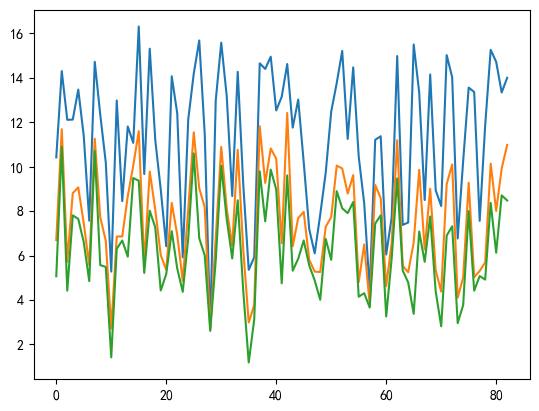

        员工编号        开班日期      开班时间       收班日期      收班时间  工作时长（小时）  驾车时长（小时）   
0   20150526  2022-04-01  06:15:33 2022-04-01  19:44:16     10.42      6.70  \
1   20180166  2022-04-01  06:41:13 2022-04-01  21:00:02     14.30     11.69   
2   20150530  2022-04-03  06:13:28 2022-04-03  18:53:00     12.11      5.72   
3   20151123  2022-04-06  05:40:26 2022-04-06  19:09:20     12.12      8.81   
4   20190018  2022-04-06  06:00:41 2022-04-06  20:18:45     13.47      9.07   
..       ...         ...       ...        ...       ...       ...       ...   
78  20160125  2022-06-26  06:00:22 2022-06-26  18:10:08     11.86      5.69   
79  20151270  2022-06-28  06:21:12 2022-06-28  22:35:12     15.26     10.14   
80  20150337  2022-06-28  07:31:18 2022-06-28  22:15:52     14.72      8.01   
81  20150542  2022-06-29  06:32:53 2022-06-29  20:57:20     13.34      9.92   
82  20210132  2022-06-29  06:50:36 2022-06-29  20:56:18     14.00     10.98   

    运营时长（小时）   车辆编号  线路编号  事故原因  事故等级  事故形态  事故责任  

TypeError: float() argument must be a string or a number, not 'datetime.date'

In [101]:
import matplotlib.pyplot as plt
y_1 = res['工作时长（小时）']
y_2 = res['驾车时长（小时）']
y_3 = res['运营时长（小时）']
x = [i for i in range(len(y_1))]
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)
plt.show()

print(res)
import seaborn as sns
hres = res[["工作时长（小时）", "驾车时长（小时）", "运营时长（小时）"]]
plot=sns.heatmap(res)
plt.show()

           员工编号      开班日期_x      开班时间       收班日期      收班时间  工作时长（小时）   
0      20151123  2022-04-01  04:36:54 2022-04-01  18:51:38     12.42  \
1      20150390  2022-04-01  05:21:37 2022-04-01  15:53:23      9.72   
2      20150422  2022-04-01  05:21:46 2022-04-01  18:45:16     12.56   
3      20070723  2022-04-01  05:22:01 2022-04-01  19:19:00     10.05   
4      20210119  2022-04-01  05:27:35 2022-04-01  18:21:46     12.83   
...         ...         ...       ...        ...       ...       ...   
21132  19950037  2022-06-30  15:12:15 2022-06-30  22:49:38      6.50   
21133  20020336  2022-06-30  17:18:51 2022-06-30  22:37:22      4.88   
21134  20020336  2022-06-30  17:18:51 2022-06-30  22:37:22      4.88   
21135  20150362  2022-06-30  18:28:05 2022-06-30  21:36:55      3.14   
21136  20210132  2022-06-30  18:33:04 2022-06-30  21:38:47      3.09   

       驾车时长（小时）  运营时长（小时）      开班日期_y     车辆编号   线路编号  事故原因  事故等级 事故形态  事故责任   
0          9.42      8.37  2022-04-06  80308.0  471.0  

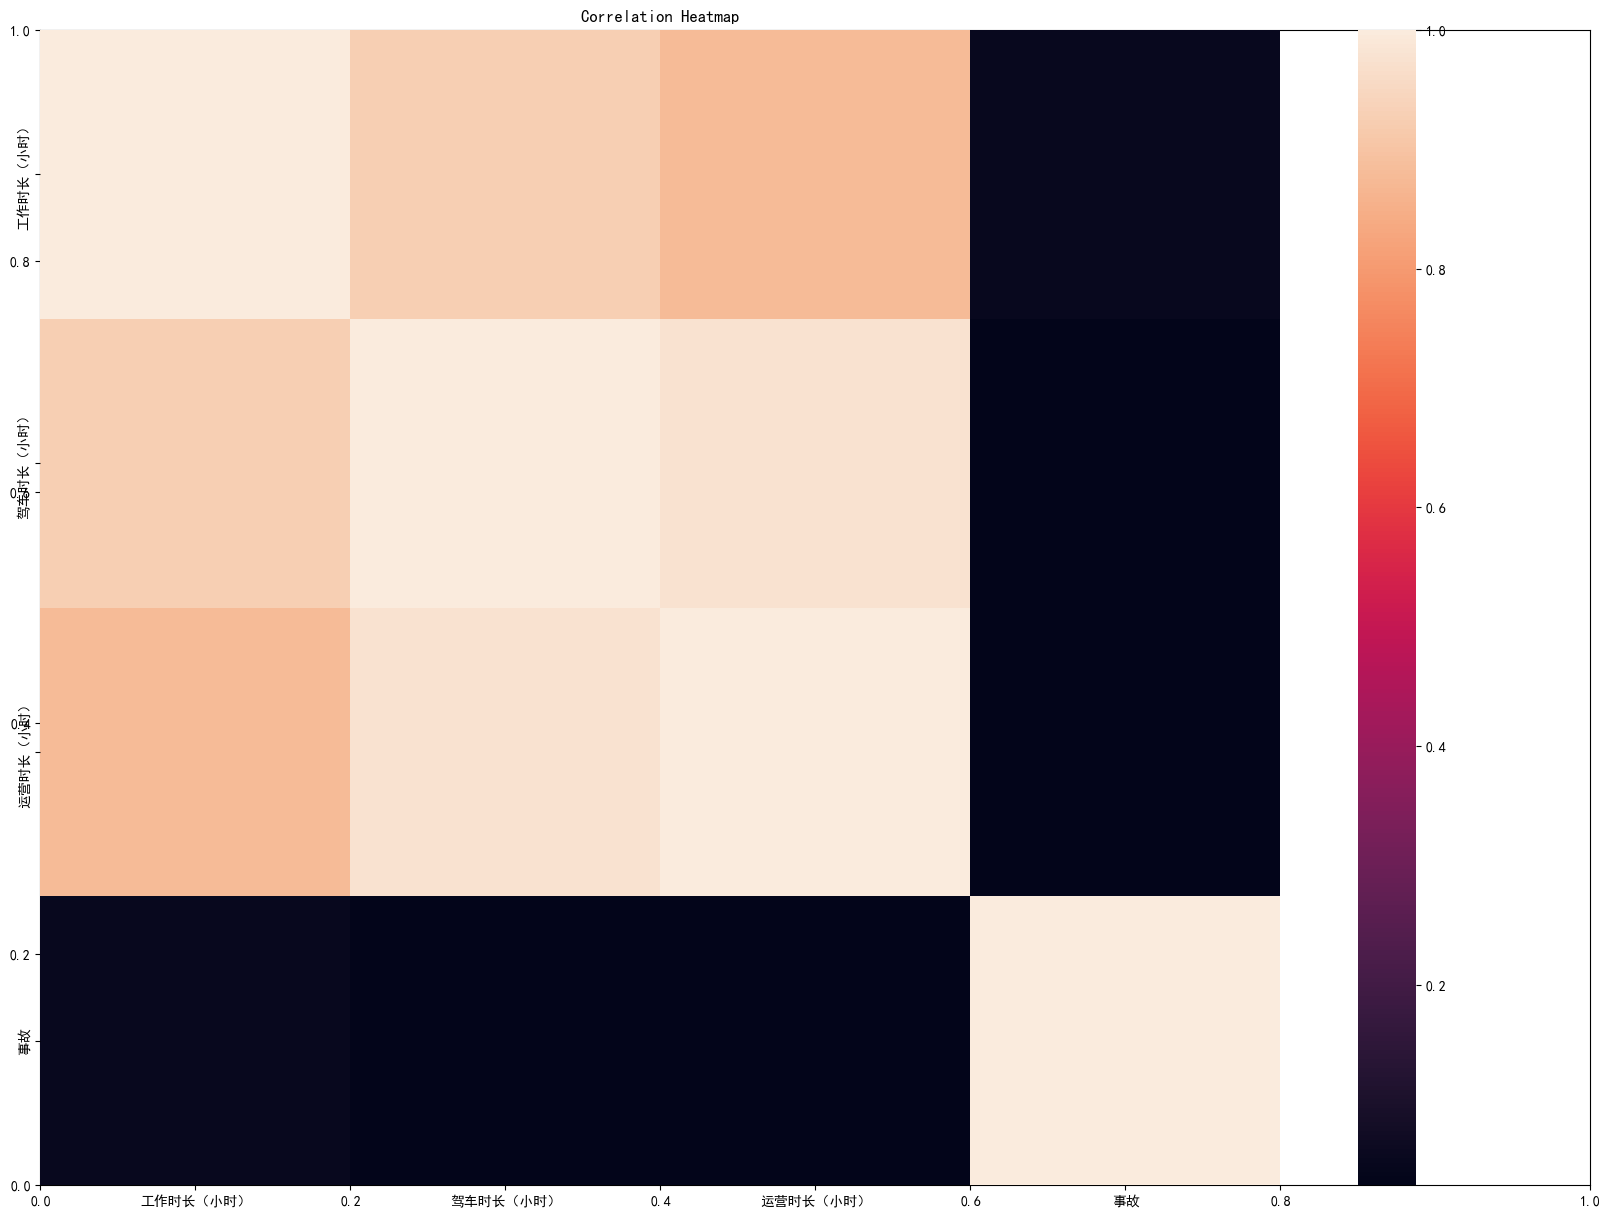

In [110]:
hh = pd.merge(pwork, safety_accident, how='left', on=['员工编号'])
hh.insert(loc=len(hh.columns.array), column="事故", value = 1)
hh.loc[hh['事故原因'].isna(), "事故"]  = 0
print(hh)
import seaborn as sns
hres = hh[["工作时长（小时）", "驾车时长（小时）", "运营时长（小时）", "事故"]]

plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = hres.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

           员工编号      开班日期_x      开班时间       收班日期      收班时间  工作时长（小时）   
0      20151123  2022-04-01  04:36:54 2022-04-01  18:51:38     12.42  \
1      20150390  2022-04-01  05:21:37 2022-04-01  15:53:23      9.72   
2      20150422  2022-04-01  05:21:46 2022-04-01  18:45:16     12.56   
3      20070723  2022-04-01  05:22:01 2022-04-01  19:19:00     10.05   
4      20210119  2022-04-01  05:27:35 2022-04-01  18:21:46     12.83   
...         ...         ...       ...        ...       ...       ...   
21132  19950037  2022-06-30  15:12:15 2022-06-30  22:49:38      6.50   
21133  20020336  2022-06-30  17:18:51 2022-06-30  22:37:22      4.88   
21134  20020336  2022-06-30  17:18:51 2022-06-30  22:37:22      4.88   
21135  20150362  2022-06-30  18:28:05 2022-06-30  21:36:55      3.14   
21136  20210132  2022-06-30  18:33:04 2022-06-30  21:38:47      3.09   

       驾车时长（小时）  运营时长（小时）      开班日期_y     车辆编号   线路编号  事故原因  事故等级 事故形态  事故责任  
0          9.42      8.37  2022-04-06  80308.0  471.0  对

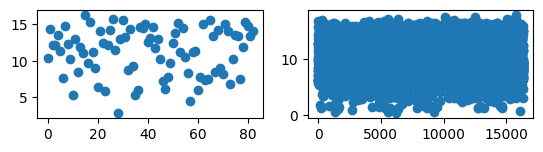

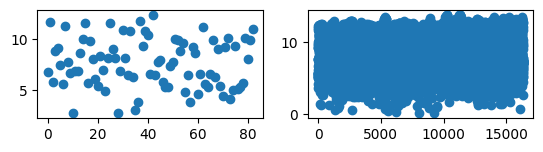

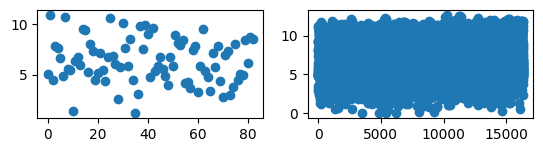

In [12]:
oth_res = pd.merge(pwork, safety_accident, how='left', on=['员工编号'])
print(oth_res)
oth_y_1 = oth_res[oth_res['开班日期_y'].isna()]['工作时长（小时）']
oth_y_2 = oth_res[oth_res['开班日期_y'].isna()]['驾车时长（小时）']
oth_y_3 = oth_res[oth_res['开班日期_y'].isna()]['运营时长（小时）']
oth_x = [i for i in range(len(oth_y_1))]
plt.subplot(3, 2, 1)
plt.scatter(x, y_1)
plt.subplot(3, 2, 2)
plt.scatter(oth_x, oth_y_1)
plt.show()
plt.subplot(3, 2, 3)
plt.scatter(x, y_2)
plt.subplot(3, 2, 4)
plt.scatter(oth_x, oth_y_2)
plt.show()
plt.subplot(3, 2, 5)
plt.scatter(x, y_3)
plt.subplot(3, 2, 6)
plt.scatter(oth_x, oth_y_3)
plt.show()

In [13]:
print(service_violation.groupby(service_violation['服务违章项目']).value_counts())

服务违章项目  服务违章日期      车辆编号   线路编号  员工编号      服务违章行为                                        
公交服务规范  2022-04-01  80282  421   20150409  公交语言规范-使用服务忌语                                     1
        2022-04-03  82579  6573  20070092  公交仪容仪表-未佩戴肩（臂)章                                   1
        2022-05-14  83488  148   20150544  公交语言规范-未使用普通话服务                                   1
        2022-06-07  83203  653   20120168  公交行为规范-服务过程中非驾驶时间打接电话、戴耳机、看短信、上网、打游戏等类似与工作无关的事    1
        2022-06-05  80296  421   20070726  其他轻微公交行为规范违章（两江）                                  1
                                                                                            ..
投诉      2022-06-21  80308  471   20151123  轻微有责乘客投诉                                          1
        2022-06-10  83501  148   20070772  一般有责乘客投诉                                          1
        2022-06-01  83488  148   20150544  一般有责乘客投诉                                          1
        2022-05-12  83472  148   20150353  一般有责乘客投诉    

        服务违章日期  车辆编号_x  线路编号_x      员工编号  服务违章项目               服务违章行为   
0   2022-04-01   83488     148  20150544  公交设施设备         公交车厢设施-移动电视坏  \
1   2022-04-01   80282     421  20150409  公交服务规范        公交语言规范-使用服务忌语   
2   2022-04-02   80319     471  20090443  公交清洁卫生           公交车身清洁-车身脏   
3   2022-04-02   81781    8631  20160262  公交清洁卫生           公交车身清洁-车身脏   
4   2022-04-03   82579    6573  20070092  公交服务规范      公交仪容仪表-未佩戴肩（臂)章   
..         ...     ...     ...       ...     ...                  ...   
132 2022-06-27   81689     887  20160319  公交清洁卫生         公交车厢清洁-车内墙板脏   
133 2022-06-27   80303     820  20150217      投诉             一般有责乘客投诉   
134 2022-06-28   83533     820  20180165  公交站运秩序         公交站车秩序-站外上下客   
135 2022-06-28   83533     820  20180165  公交站运秩序         公交站车秩序-站外上下客   
136 2022-06-28   83492     148  19970047  公交站运秩序  公交站车秩序-未尾随到站前端停靠上下客   

           开班日期   车辆编号_y  线路编号_y        事故原因  事故等级 事故形态  事故责任  
0    2022-05-15  83488.0   148.0        对方原因  轻微事故   擦挂    

C:\Users\Administrator\AppData\Local\Temp\ipykernel_33500\3670940562.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_num = len(service_res[oth_res['开班日期_y'].isna()])


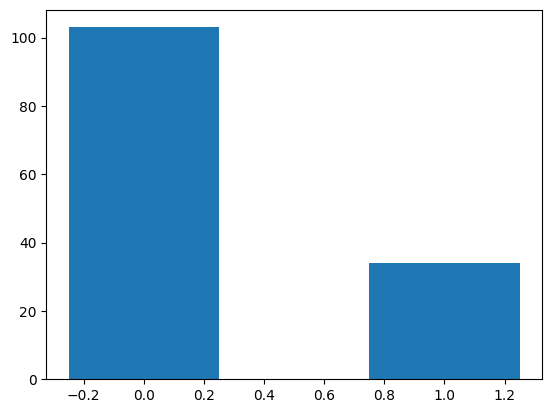

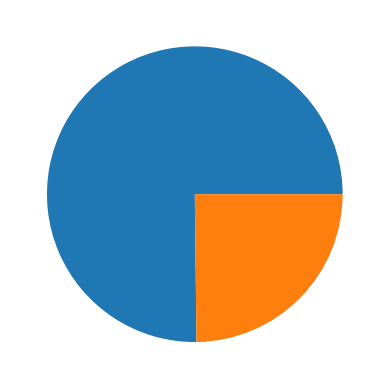

In [14]:
service_res = pd.merge(service_violation, safety_accident, how='left', on=['员工编号'])
print(service_res)
no_num = len(service_res[oth_res['开班日期_y'].isna()])
ys_num = len(service_res['服务违章项目']) - no_num
plt.bar([0, 1], [no_num, ys_num],  width=0.5)
plt.show()
plt.pie([float(no_num)/float(no_num + ys_num), float(ys_num)/float(no_num + ys_num)])
plt.show()

In [22]:
# pinformation
# pinformation = pinformation.drop(labels=[ "服务违章"], axis=1)
pinformation.insert(loc=6, column="服务违章", value = 0)

pinformation.loc[pinformation["员工编号"].isin(service_violation["员工编号"]), "服务违章"] = 1
pinformation

员工编号 性别  出生日期  学历  入职日期      初领证日期  服务违章
0    20090587  1    50   4    14 2002-07-01     0
1    20150102  1    37   1     8 2006-10-11     0
2    20150222  1    32   1     8 2011-10-25     0
3    20130164  1    48   5    10 2003-12-19     0
4    20151288  1    37   9    10 2011-04-22     0
..        ... ..   ...  ..   ...        ...   ...
439  20150099  1    47   1     8        NaT     0
440  20150372  1    41   9    12        NaT     0
441  20151285  1    49   9    22        NaT     0
442  20180098  1    29   1     5        NaT     0
443  20200056  0    27   5     3        NaT     0

[444 rows x 7 columns]

        安全违章日期   车辆编号_x  线路编号_x      员工编号        安全违章项目              安全违章行为   
0   2022-04-01  83498.0   148.0  20150407      安全投诉（两江）             其它类安全投诉  \
1   2022-04-01  80318.0   471.0  20040889      公交危险驾驶行为  遇行人通过人行横道、路口不停车让行的   
2   2022-04-02  80311.0   471.0  20150542  违反公交一般道路通行规定                违章变道   
3   2022-04-02  80311.0   471.0  20150542  违反公交一般道路通行规定                违章变道   
4   2022-04-02  80311.0   471.0  20150542  违反公交一般道路通行规定                违章变道   
..         ...      ...     ...       ...           ...                 ...   
128 2022-06-26      NaN     NaN  20090636      违反公交安全规定            其他轻微违章行为   
129 2022-06-27  83502.0   148.0  20080002      违反公交安全规定        未等乘客拉好、坐稳起步的   
130 2022-06-29  80333.0   471.0  20160186      违反公交安全规定            其他轻微违章行为   
131 2022-06-29  82737.0   887.0  20210084      违反公交安全规定            其他轻微违章行为   
132 2022-06-30  82737.0   887.0  20210084     公交GPS超速违章          超速10（不含）以下   

           开班日期   车辆编号_y  线路编号_y  事故原因  事故等级 事故形态 事

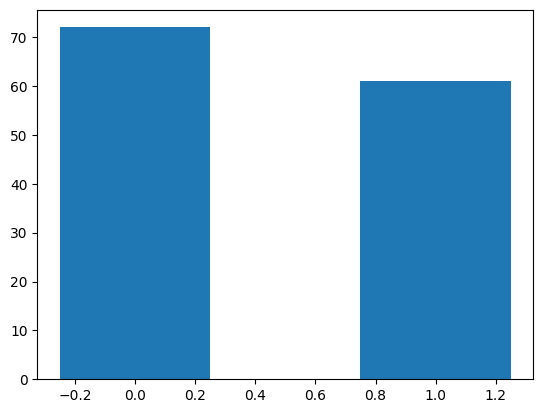

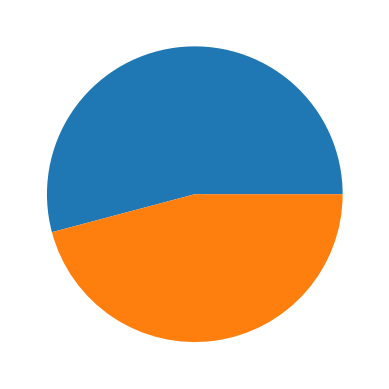

In [16]:
safety_res = pd.merge(safety_violation, safety_accident, how='left', on=['员工编号'])
print(safety_res)
sno_num = len(safety_res[safety_res['开班日期'].isna()])
sys_num = len(safety_res['安全违章项目']) - sno_num
plt.bar([0, 1], [sno_num, sys_num],  width=0.5)
plt.show()
plt.pie([float(sno_num)/float(sno_num + sys_num), float(sys_num)/float(sno_num + sys_num)])
plt.show()

In [23]:

pinformation.insert(loc=7, column="安全违章", value = 0)
pinformation
pinformation.loc[pinformation["员工编号"].isin(safety_violation["员工编号"]), "安全违章"] = 1
print(pinformation["安全违章"].value_counts())

安全违章
0    366
1     78
Name: count, dtype: int64


In [24]:
pinformation.insert(loc=8, column="事故", value = 0)
pinformation
pinformation.loc[pinformation["员工编号"].isin(safety_accident["员工编号"]), "事故"] = 1
pinformation

员工编号 性别  出生日期  学历  入职日期      初领证日期  服务违章  安全违章  事故
0    20090587  1    50   4    14 2002-07-01     0     0   0
1    20150102  1    37   1     8 2006-10-11     0     0   0
2    20150222  1    32   1     8 2011-10-25     0     0   0
3    20130164  1    48   5    10 2003-12-19     0     0   0
4    20151288  1    37   9    10 2011-04-22     0     0   0
..        ... ..   ...  ..   ...        ...   ...   ...  ..
439  20150099  1    47   1     8        NaT     0     0   0
440  20150372  1    41   9    12        NaT     0     0   0
441  20151285  1    49   9    22        NaT     0     0   0
442  20180098  1    29   1     5        NaT     0     0   0
443  20200056  0    27   5     3        NaT     0     0   0

[444 rows x 9 columns]

In [25]:
pinformation = pinformation.drop(labels=["初领证日期"], axis=1)
pinformation = pinformation.drop(labels=["员工编号"], axis=1)
# pinformation = pinformation.drop(labels=["入职日期"], axis=1)
pinformation
print(pinformation['事故'].value_counts())
pinformation.to_csv("./data1.csv", index = False)

事故
0    380
1     64
Name: count, dtype: int64


In [26]:
print(pinformation[pinformation['安全违章']==1]['事故'].value_counts())

事故
0    56
1    22
Name: count, dtype: int64


In [27]:
data_list = pinformation.values.tolist()
print(data_list)
label_list = []
for i in range(len(data_list)):
    label_list.append([data_list[i][-1]])
    data_list[i] = data_list[i][:-1]
print(data_list)
print(label_list)

[[1, 50, 4, 14, 0, 0, 0], [1, 37, 1, 8, 0, 0, 0], [1, 32, 1, 8, 0, 0, 0], [1, 48, 5, 10, 0, 0, 0], [1, 37, 9, 10, 0, 0, 0], [1, 37, 6, 11, 0, 0, 0], [1, 34, 9, 10, 0, 0, 0], [1, 33, 4, 10, 0, 0, 0], [1, 49, 4, 13, 0, 0, 0], [1, 35, 6, 9, 0, 0, 0], [1, 49, 2, 33, 0, 0, 0], [1, 54, 4, 11, 0, 0, 0], [1, 32, 1, 8, 0, 0, 0], [1, 32, 1, 8, 0, 0, 0], [1, 34, 1, 8, 0, 0, 0], [1, 37, 1, 7, 0, 0, 0], [1, 31, 1, 7, 0, 0, 0], [1, 47, 1, 26, 0, 0, 0], [1, 42, 1, 18, 0, 0, 0], [1, 29, 1, 7, 0, 0, 0], [1, 48, 9, 29, 0, 0, 0], [1, 47, 9, 16, 0, 0, 0], [1, 36, 3, 12, 0, 0, 0], [1, 60, 4, 20, 0, 0, 0], [1, 48, 6, 18, 0, 0, 0], [1, 44, 4, 17, 0, 0, 0], [1, 42, 5, 16, 0, 0, 0], [1, 46, 3, 11, 0, 0, 0], [1, 34, 9, 10, 0, 0, 0], [1, 52, 5, 8, 0, 0, 0], [1, 29, 1, 5, 0, 0, 0], [1, 45, 4, 8, 0, 0, 0], [1, 49, 1, 7, 0, 0, 0], [1, 45, 1, 9, 0, 0, 0], [1, 34, 7, 2, 1, 1, 1], [1, 34, 0, 7, 1, 0, 0], [1, 32, 1, 7, 0, 0, 0], [1, 35, 1, 7, 0, 0, 0], [0, 38, 2, 16, 0, 0, 0], [1, 30, 4, 5, 0, 0, 0], [1, 49, 1, 7, 0, 1

In [85]:
import torch
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x_data = torch.Tensor(data_list).to(device)
y_data = torch.Tensor(label_list).to(device)


class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(6, 3)
        self.linear1 = torch.nn.Linear(3, 1)
        self.log_softmax = torch.nn.LogSoftmax()
    def forward(self, x):
        y_pred = F.sigmoid(self.linear1(self.log_softmax(self.linear(x))))
        return y_pred

from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.linear_model import LogisticRegression
#封装好的方法，用来获取某个模型的P,R,TPR,FPR值
def num_get(y_score,y_test):
    #由于我们是多标签模型，所以循环输出每种标签的值
    Precision,Recall,_ = precision_recall_curve(y_test[:],y_score[:])
    FPR,TPR,_ = roc_curve(y_test[:], y_score[:])
    return Precision,Recall,TPR,FPR

def draw_line(Precision,Recall,TPR,FPR,classes,title):
    plt.figure(figsize=(14, 8))
    plt.suptitle(title+' 的P-R曲线和ROC曲线', fontsize = 30)
    ax1=plt.subplot(1,2,1)
    plt.xlabel("Recall")
    plt.ylabel("Preccision")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    l, = plt.plot(Recall, Precision)
    ax2=plt.subplot(1,2,2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    l, = plt.plot(FPR, TPR)
    ax1.set_title("P-R Pic")
    ax2.set_title("ROC Pic")
    plt.savefig(title+'PR-ROC.png')
    plt.show()
    return 0

model = LogisticRegressionModel().to(device)

criterion = torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
mseloss = torch.nn.MSELoss().to(device)

x_data = torch.Tensor(data_list)
y_data = torch.Tensor(label_list)
clf = LogisticRegression(max_iter=1)
print(x_data.shape, y_data.shape)
clf.fit(x_data, y_data)
y_pred = clf.predict(x_data)
print(y_pred)
loss = mseloss(torch.tensor(y_pred), y_data)
print(loss.item())
# for epoch in range(500):
#     y_pred = model(x_data)
#
#     print(y_pred[10: 15])
#     loss = mseloss(F.softmax(y_pred), y_data)
#     print(epoch, loss.item())
#     # for name, parms in model.named_parameters():
#     #                 print('-->name:', name)
#     #                 print('-->para:', parms)
#     #                 print('-->grad_requirs:',parms.requires_grad)
#     #                 print('-->grad_value:',parms.grad)
#     #                 print("===")
#     # print("***************************************************")
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
#     for name, parms in model.named_parameters():
#                 print('-->name:', name)
#                 print('-->para:', parms)
#                 print('-->grad_requirs:',parms.requires_grad)
#                 print('-->grad_value:',parms.grad)
#                 print("===")


torch.Size([444, 6]) torch.Size([444, 1])
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.

D:\anaconda\conda\envs\gz\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
D:\anaconda\conda\envs\gz\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\conda\envs\gz\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\

T:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
T:  [[ 0.02153652]
 [-0.00604871]
 [-0.01734773]
 [ 0.00102855]
 [ 0.01986602]
 [ 0.02390654]]
T:  [[ 0.03931294]
 [-0.01190975]
 [-0.03185989]
 [ 0.00307518]
 [ 0.0367134 ]
 [ 0.04444663]]
T:  [[ 0.05400927]
 [-0.01759642]
 [-0.04400993]
 [ 0.00587232]
 [ 0.05102367]
 [ 0.06213165]]
T:  [[ 0.06618715]
 [-0.02311608]
 [-0.05419478]
 [ 0.00920782]
 [ 0.06320193]
 [ 0.07739492]]
T:  [[ 0.07630545]
 [-0.02847224]
 [-0.06274439]
 [ 0.01291547]
 [ 0.07358688]
 [ 0.0906012 ]]
T:  [[ 0.08473718]
 [-0.033666  ]
 [-0.06993199]
 [ 0.01686605]
 [ 0.08246098]
 [ 0.10205678]]
T:  [[ 0.09178519]
 [-0.03869723]
 [-0.07598364]
 [ 0.02095975]
 [ 0.09005978]
 [ 0.1120188 ]]
T:  [[ 0.09769553]
 [-0.04356522]
 [-0.08108646]
 [ 0.02511987]
 [ 0.09657987]
 [ 0.12070344]]
T:  [[ 0.10266842]
 [-0.04826925]
 [-0.0853956 ]
 [ 0.02928786]
 [ 0.10218571]
 [ 0.12829278]]
T:  [[ 0.10686716]
 [-0.05280886]
 [-0.08903993]
 [ 0.03341938]
 [ 0.10701511]
 [ 0.13494057]]
T:  [[ 0.

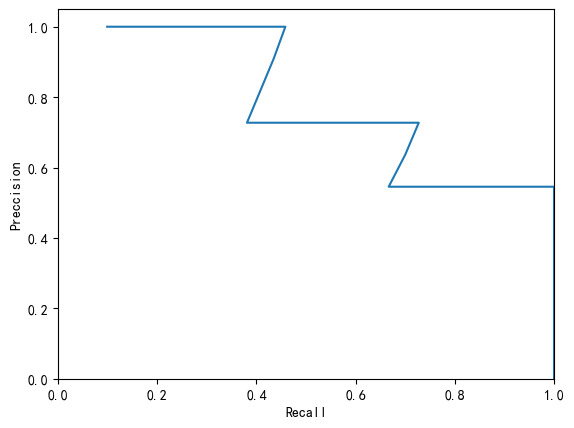

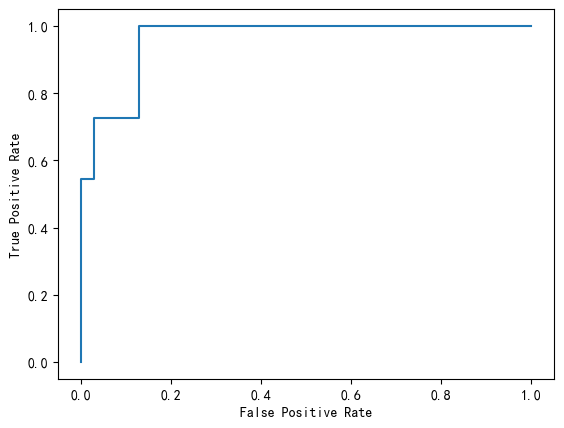

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [133]:
"""

@Author: sanshui
@Time:2021/11/15 15:15
@Software: PyCharm
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


def get_data():
    """
    获取数据集
    :return:
    """
    iris = load_iris()

    return iris.data, iris.target


def split_data(data, target):
    """
    划分数据集
    :param data:
    :param target:
    :return:
    """
    data = np.array(data)
    target = np.array(target)
    target = np.reshape(target, (target.shape[0], 1))

    # 正则化数据，防止数据大小本身对结果造成影响
    sd = StandardScaler()
    data = sd.fit_transform(data)

    # 拼接特征值与类别
    dataset = np.hstack((data, target))
    n = dataset.shape[0]

    # 打乱数据
    np.random.shuffle(dataset)

    # 划分数据集，返回训练集与测试集
    train = dataset[:int(0.75 * n), :]
    test = dataset[int(0.75 * n):, :]

    return train, test


def sigmoid(z):
    """
    sigmoid函数
    :param z:
    :return:
    """
    return 1 / (1 + np.exp(-z))


def draw_sigmoid():
    """
    画出sigmoid函数
    :return:
    """
    fig, ax = plt.subplots()
    x_data = np.arange(-10, 10, 0.1)
    ax.plot(x_data, sigmoid(x_data))
    plt.show()


def calCost(dataset, theta):
    """
    计算代价函数
    :param dataset:
    :param theta:
    :return:
    """
    x = dataset[:, :-1]
    y = dataset[:, -1:]
    z = x @ theta.T
    # 训练数据个数,或者用m = y.shape[1]
    m = y.size
    para1 = np.multiply(-y, np.log(sigmoid(z)))
    para2 = np.multiply((1 - y), np.log(1 - sigmoid(z)))
    # 代价函数Y
    J = 1 / m * np.sum(para1 - para2)
    return J


def gradient(dataset, theta, iters, alpha):
    """
    梯度下降
    :param dataset:
    :param theta:
    :param iters:
    :param alpha:
    :return:
    """
    # 存放每次梯度下降后的损失值
    x = dataset[:, :-1]
    y = dataset[:, -1:]
    for i in range(iters):
        print("T: ", theta.T)
        h_x = sigmoid(x @ theta.T)

        theta = theta - alpha / len(x) * (h_x - y).T @ x
    return theta


def get_per_classify_data(data, i):
    """
    返回第i类的数据
    :param data:数据集
    :param i:类别
    :return:
    """
    return data[data[:, -1] == i]


def get_final_theta(data, i, theta, iters, alpha):
    """
    获取梯度下降后的theta值
    :param data:
    :param i:
    :param theta:
    :param iters:
    :param alpha:
    :return:
    """
    dataset = get_per_classify_data(data, i)
    return gradient(dataset, theta, iters, alpha)


def predict(dataset, theta_list):
    """
    预测结果
    :param dataset:
    :param theta_list:
    :return:
    """
    x = dataset[:, :-1]
    per_theta_list = [i[0] for i in theta_list]
    per_theta_list = np.array(per_theta_list)

    per_prob = sigmoid(np.dot(x, per_theta_list.T))

    # 返回每行最大值所在的索引，即概率最大的类别
    # print(np.max(per_prob, axis=1))
    # return np.argmax(per_prob, axis=1)
    return per_prob

from scipy.interpolate import make_interp_spline

if __name__ == '__main__':
    plt.rcParams['font.sans-serif'] = 'SimHei'  # 黑体
    plt.rcParams['axes.unicode_minus'] = False  # 显示负号

    data, target = get_data()

    target_list = []
    for i in label_list:
        target_list.append(i[0])

    # print(data.shape, target.shape, np.array(data_list).shape, np.array(target_list).shape)
    # print(target_list)
    train, test = split_data(np.array(data_list), np.array(target_list))
    # draw_sigmoid()

    iters = 1000 # 迭代次数
    alpha = 0.5 # 学习率
    theta_list = []
    for i in range(np.array(data_list).shape[1]):
        theta = np.zeros((1, np.array(data_list).shape[1]))
        theta_list.append(theta)

    final_theta_list = []
    target_list1 = list(set(np.array(target_list)))

    for i in target_list1:
        theta_i = get_final_theta(train, i, theta_list[target_list1.index(i)], iters, alpha)
        final_theta_list.append(theta_i)


    y_predict = predict(test, final_theta_list)
    res_pre = []
    # print(y_predict.shape,test.shape)
    for i in range(len(test)):
        # print(test[i][-1], y_predict[i])
        res_pre.append(y_predict[i][int(test[i][-1])])
        # print(test[i][-1], y_predict[i], res_pre[i])
    Precision,Recall,throds = precision_recall_curve(test[:, -1], res_pre)
    FPR,TPR,_ = roc_curve(test[:, -1], res_pre)
    # print(y_predict.shape, test[:, -1].shape, Precision,Recall, throds)

    plt.xlabel("Recall")
    plt.ylabel("Preccision")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.plot(Precision, Recall)
    plt.show()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot(FPR, TPR)
    plt.show()
    # 查看预测准确度
    print(classification_report(y_predict, test[:, -1]))



In [206]:
print(torch.nn.Softmax()(torch.tensor([0.3])))

tensor([1.])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_26836\4022395161.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(torch.nn.Softmax()(torch.tensor([0.3])))


In [46]:
from sklearn.metrics import precision_recall_curve, roc_curve, classification_report
def num_get(y_score,y_test):
    #由于我们是多标签模型，所以循环输出每种标签的值
    Precision,Recall,_ = precision_recall_curve(y_test[:],y_score[:])
    FPR,TPR,_ = roc_curve(y_test[:], y_score[:])
    return Precision,Recall,TPR,FPR

def draw_line(Precision,Recall,TPR,FPR,classes,title='model'):
    plt.figure(figsize=(14, 8))
    plt.suptitle(title+' 的P-R曲线和ROC曲线', fontsize = 30)
    ax1=plt.subplot(1,2,1)
    plt.xlabel("Recall")
    plt.ylabel("Preccision")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    l, = plt.plot(Recall, Precision)
    ax2=plt.subplot(1,2,2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    l, = plt.plot(FPR, TPR)
    ax1.set_title("P-R Pic")
    ax2.set_title("ROC Pic")
    plt.savefig(title+'PR-ROC.png')
    plt.show()

Net(
  (hidden1): Linear(in_features=6, out_features=24, bias=True)
  (hidden2): Linear(in_features=24, out_features=24, bias=True)
  (predict): Linear(in_features=24, out_features=2, bias=True)
)
torch.Size([444])
tensor([[0.4845, 0.5155],
        [0.4851, 0.5149],
        [0.4846, 0.5154],
        [0.4846, 0.5154],
        [0.4842, 0.5158],
        [0.4842, 0.5158],
        [0.4843, 0.5157],
        [0.4842, 0.5158],
        [0.4846, 0.5154],
        [0.4843, 0.5157],
        [0.4858, 0.5142],
        [0.4849, 0.5151],
        [0.4846, 0.5154],
        [0.4846, 0.5154],
        [0.4848, 0.5152],
        [0.4853, 0.5147],
        [0.4847, 0.5153],
        [0.4848, 0.5152],
        [0.4843, 0.5157],
        [0.4844, 0.5156],
        [0.4845, 0.5155],
        [0.4839, 0.5161],
        [0.4843, 0.5157],
        [0.4843, 0.5157],
        [0.4840, 0.5160],
        [0.4842, 0.5158],
        [0.4841, 0.5159],
        [0.4849, 0.5151],
        [0.4843, 0.5157],
        [0.4848, 0.5152],
     

D:\anaconda\conda\envs\gz\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15772\3718026890.py:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(prediction))


17   loss:  0.45575979351997375
tensor([[0.7408, 0.2592],
        [0.7417, 0.2583],
        [0.7406, 0.2594],
        [0.7417, 0.2583],
        [0.7392, 0.2608],
        [0.7393, 0.2607],
        [0.7389, 0.2611],
        [0.7394, 0.2606],
        [0.7411, 0.2589],
        [0.7398, 0.2602],
        [0.7360, 0.2640],
        [0.7425, 0.2575],
        [0.7406, 0.2594],
        [0.7406, 0.2594],
        [0.7410, 0.2590],
        [0.7420, 0.2580],
        [0.7408, 0.2592],
        [0.7375, 0.2625],
        [0.7387, 0.2613],
        [0.7403, 0.2597],
        [0.7352, 0.2648],
        [0.7382, 0.2618],
        [0.7394, 0.2606],
        [0.7401, 0.2599],
        [0.7383, 0.2617],
        [0.7386, 0.2614],
        [0.7384, 0.2616],
        [0.7416, 0.2584],
        [0.7389, 0.2611],
        [0.7428, 0.2572],
        [0.7411, 0.2589],
        [0.7422, 0.2578],
        [0.7439, 0.2561],
        [0.7427, 0.2573],
        [0.7418, 0.2582],
        [0.7417, 0.2583],
        [0.7410, 0.2590],
      

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15772\3718026890.py:102: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  res_pre.append(F.softmax(pp).detach().numpy()[i][int(y[i])])


tensor([0.8626, 0.0000]) 0 0.703201
tensor([0.8627, 0.0000]) 0 0.7032235
tensor([0.8646, 0.0000]) 0 0.7036213
tensor([0.8657, 0.0000]) 0 0.7038552
tensor([0.8613, 0.0000]) 0 0.7029364
tensor([0.8612, 0.0000]) 0 0.7029203
tensor([0.8629, 0.0000]) 0 0.7032729
tensor([0.8616, 0.0000]) 0 0.70300424
tensor([0.8588, 0.0000]) 0 0.7024004
tensor([0.8694, 0.0000]) 0 0.7046109
tensor([0.8671, 0.0000]) 0 0.70413643
tensor([0.8552, 0.0000]) 0 0.701657
tensor([0.8619, 0.0000]) 0 0.7030489
tensor([0.8538, 0.0000]) 0 0.7013722
tensor([0.8699, 0.0000]) 0 0.70472795
tensor([0.8664, 0.0000]) 0 0.70400125
tensor([0.8660, 0.0000]) 0 0.7039225
tensor([0.8681, 0.0000]) 1 0.2956515
tensor([0.8687, 0.0000]) 0 0.7044696
tensor([0.8652, 0.0000]) 0 0.70375633
tensor([0.8570, 0.0000]) 0 0.7020392
tensor([0.8647, 0.0000]) 0 0.7036412
tensor([0.8582, 0.0000]) 0 0.7022854
tensor([0.8666, 0.0000]) 0 0.70402956
tensor([0.8671, 0.0000]) 0 0.7041515
tensor([0.8688, 0.0000]) 0 0.70449626
tensor([0.8675, 0.0000]) 0 0.7042

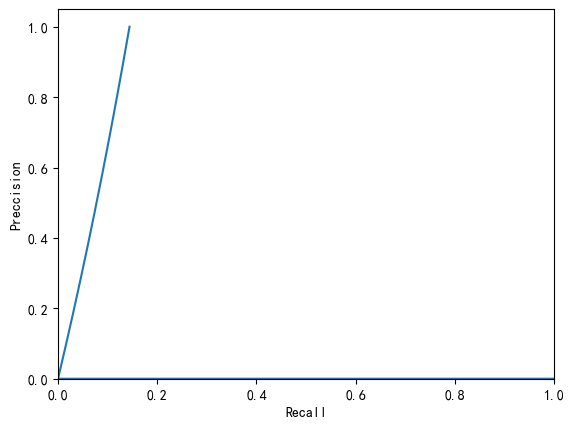

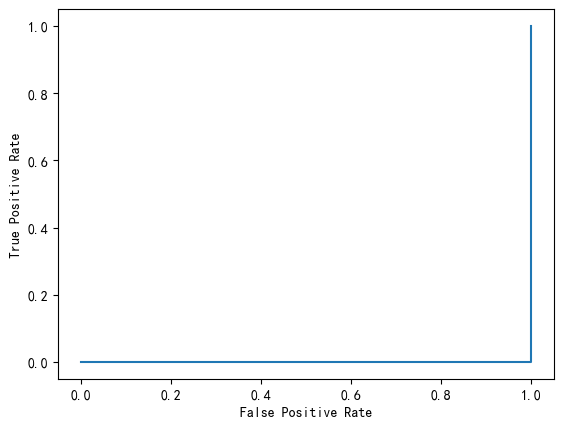

In [131]:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)
# print(x0)
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)


x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1)).type(torch.LongTensor)
# print(y)
x,y = Variable(x),Variable(y)

# plt.scatter(x[:,0],x[:,1],c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
# plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
# plt.show()

class Net(torch.nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = torch.nn.Linear(n_input,n_hidden)
        self.hidden2 = torch.nn.Linear(n_hidden,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)

    def forward(self, input):
        out = self.hidden1(input)
        out = F.sigmoid(out)
        out = self.hidden2(out)
        out = F.sigmoid(out)
        out = self.predict(out)
        # out = F.softmax(out)
        return out

net = Net(6,24,2)
print(net)

optimizer = torch.optim.SGD(net.parameters(),lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

plt.ion()
plt.show()
y = []
for i in range(len(label_list)):
    y.append(label_list[i][0])
print(torch.tensor(y).shape)
p1 = []
p2 = []
p3 = []
p4 = []
pp = None
for t in range(200):
    prediction = net(torch.tensor(data_list).type(torch.FloatTensor))
    # p11, p22, p33, p44 = num_get(F.softmax(prediction).detach().numpy() , y)
    # p1.append(p11)
    # p2.append(p22)
    # p3.append(p33)
    # p4.append(p44)
    # print(classification_report(prediction.detach().numpy(), y))
    # print(prediction)
    pp = prediction
    print(F.softmax(prediction))
    loss = loss_func(prediction,torch.tensor(y))
    p1.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(t, "  loss: ", loss.item())

    # if t%2==0:
    #     plt.cla()
    #     # 过了一道 softmax 的激励函数后的最大概率才是预测值
    #     # print(F.softmax(prediction))
    #     prediction = torch.max(F.softmax(prediction),1)[1]
    #     pred_y = prediction.data.numpy().squeeze()
    #     target_y = torch.tensor(y).data.numpy()
    #     plt.scatter(torch.tensor(data_list).data.numpy()[:, 0], torch.tensor(data_list).data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
    #     accuracy = sum(pred_y == target_y) / 200.  # 预测中有多少和真实值一样
    #     plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color': 'red'})
    #     plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()

# plt.plot([i for i in range(len(p1))], p1)
# plt.show()
res_pre = []
p = []
for i in range(len(y)):
    # print(test[i][-1], y_predict[i])
    pp = pp.detach().numpy()
    for j in range(2):
        if pp[i][j] < 0:
            pp[i][j]=0
    pp = torch.tensor(pp)
    res_pre.append(F.softmax(pp).detach().numpy()[i][int(y[i])])

    print(pp[i], y[i], res_pre[i])
Precision,Recall,throds = precision_recall_curve(y, res_pre)
FPR,TPR,_ = roc_curve(y, res_pre)
# print(y_predict.shape, test[:, -1].shape, Precision,Recall, throds)

plt.xlabel("Recall")
plt.ylabel("Preccision")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.plot(Precision, Recall)
plt.show()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(FPR, TPR)
plt.show()

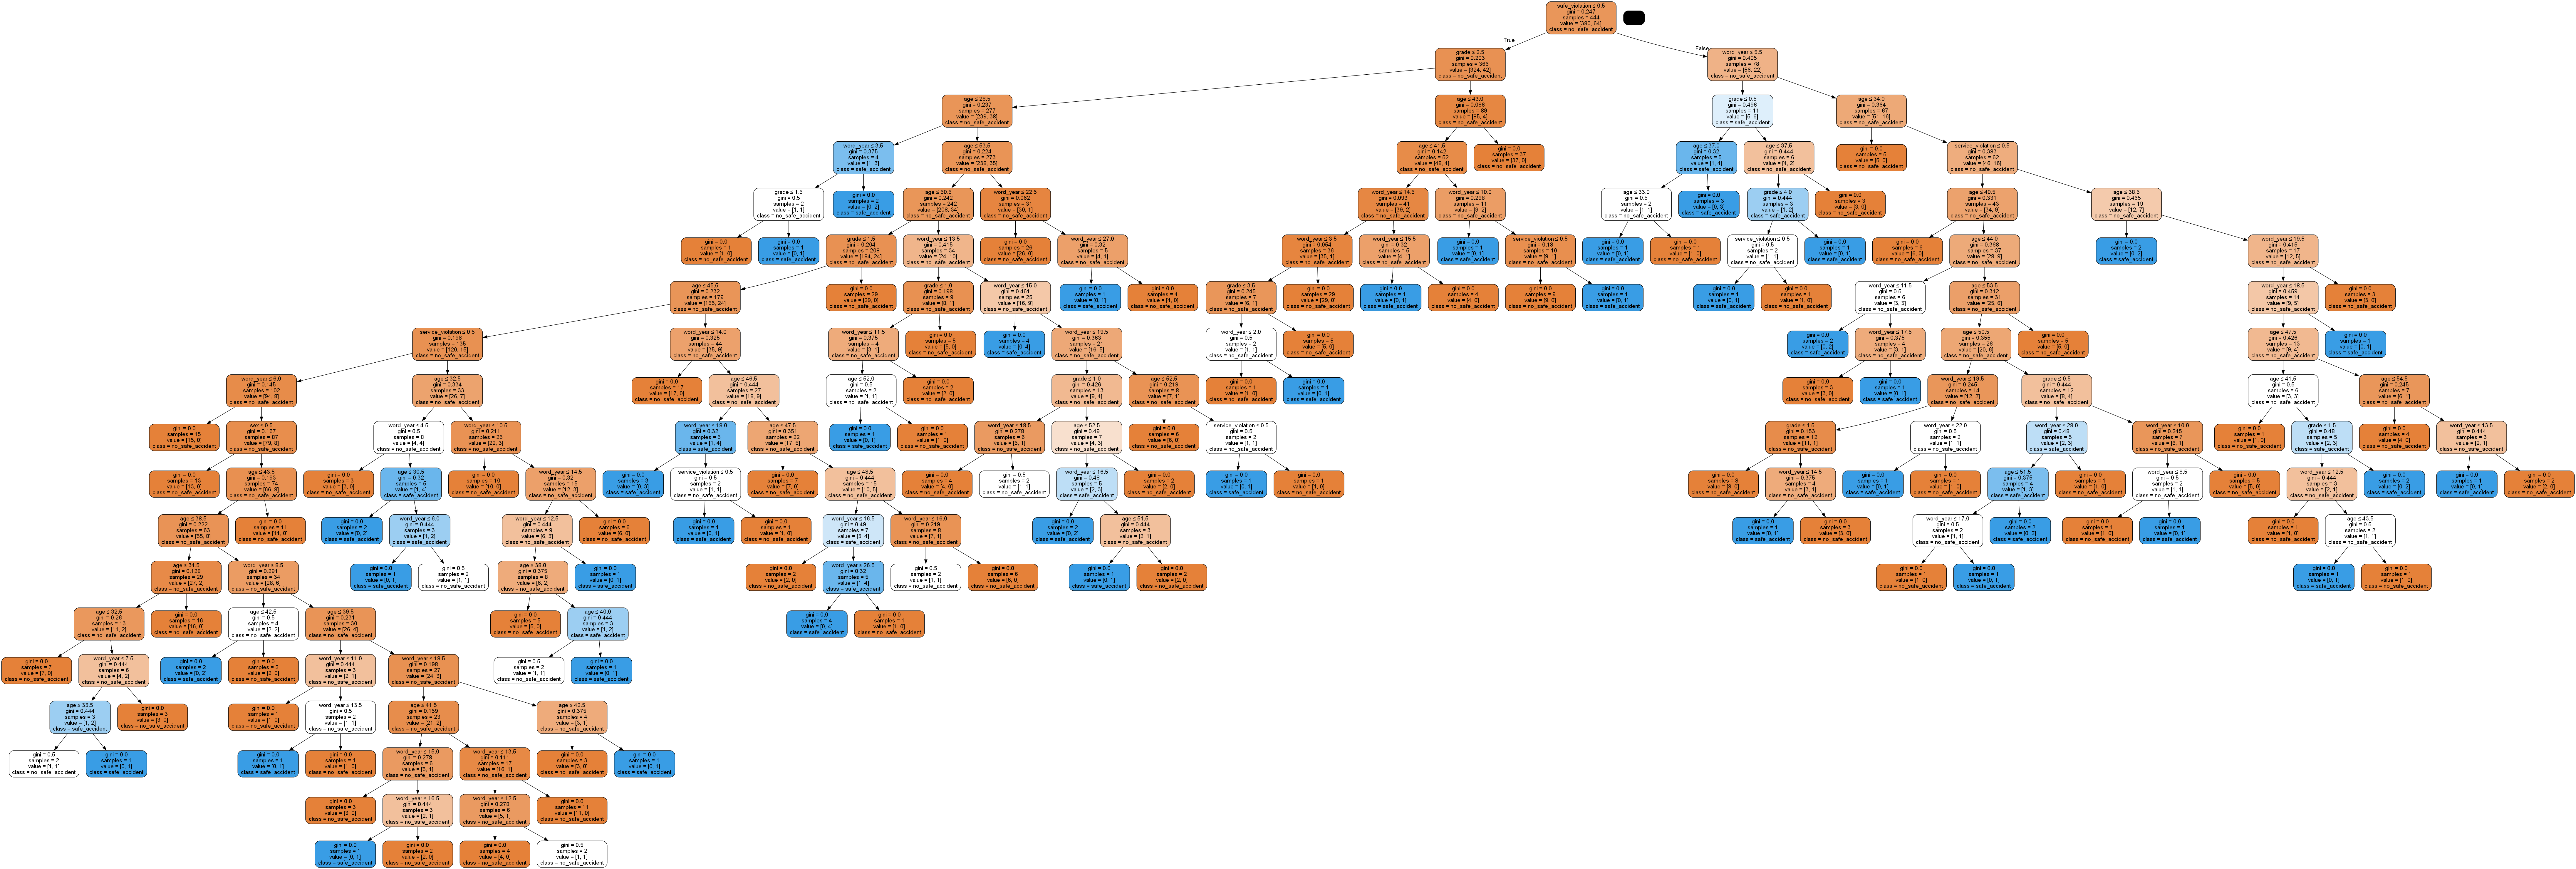

In [38]:
from sklearn import tree
import numpy as np
from io import StringIO
import pydotplus
X = np.array(data_list)
y = np.array(label_list)
tree_model = tree.DecisionTreeClassifier(criterion='gini',
                                         max_depth=None,
                                         min_samples_leaf=1,
                                         ccp_alpha=0.0)
tree_model.fit(X, y)
dot_data = StringIO()
feature_names = ["sex", "age", "grade", "word_year", "service_violation", "safe_violation"]
target_names = ['no_safe_accident', 'safe_accident']
tree.export_graphviz(tree_model,
                     out_file=dot_data,
                     feature_names=feature_names,
                     class_names=target_names,
                     filled=True,
                     rounded=True,
                     special_characters=True)
dot_data_val = dot_data.getvalue()
dot_data_val = dot_data_val.replace('helvetica', 'MicrosoftYaHei')
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
from IPython.display import Image   # 可视化展示决策树
Image(graph.create_png())

In [30]:
for i in range(len(data_list)):
    data_list[i].append(label_list[i][0])
data_list

[[1, 50, 4, 14, 0, 0, 0],
 [1, 37, 1, 8, 0, 0, 0],
 [1, 32, 1, 8, 0, 0, 0],
 [1, 48, 5, 10, 0, 0, 0],
 [1, 37, 9, 10, 0, 0, 0],
 [1, 37, 6, 11, 0, 0, 0],
 [1, 34, 9, 10, 0, 0, 0],
 [1, 33, 4, 10, 0, 0, 0],
 [1, 49, 4, 13, 0, 0, 0],
 [1, 35, 6, 9, 0, 0, 0],
 [1, 49, 2, 33, 0, 0, 0],
 [1, 54, 4, 11, 0, 0, 0],
 [1, 32, 1, 8, 0, 0, 0],
 [1, 32, 1, 8, 0, 0, 0],
 [1, 34, 1, 8, 0, 0, 0],
 [1, 37, 1, 7, 0, 0, 0],
 [1, 31, 1, 7, 0, 0, 0],
 [1, 47, 1, 26, 0, 0, 0],
 [1, 42, 1, 18, 0, 0, 0],
 [1, 29, 1, 7, 0, 0, 0],
 [1, 48, 9, 29, 0, 0, 0],
 [1, 47, 9, 16, 0, 0, 0],
 [1, 36, 3, 12, 0, 0, 0],
 [1, 60, 4, 20, 0, 0, 0],
 [1, 48, 6, 18, 0, 0, 0],
 [1, 44, 4, 17, 0, 0, 0],
 [1, 42, 5, 16, 0, 0, 0],
 [1, 46, 3, 11, 0, 0, 0],
 [1, 34, 9, 10, 0, 0, 0],
 [1, 52, 5, 8, 0, 0, 0],
 [1, 29, 1, 5, 0, 0, 0],
 [1, 45, 4, 8, 0, 0, 0],
 [1, 49, 1, 7, 0, 0, 0],
 [1, 45, 1, 9, 0, 0, 0],
 [1, 34, 7, 2, 1, 1, 1],
 [1, 34, 0, 7, 1, 0, 0],
 [1, 32, 1, 7, 0, 0, 0],
 [1, 35, 1, 7, 0, 0, 0],
 [0, 38, 2, 16, 0, 0, 0],
 [1,

In [26]:
pinformation.columns.array

<PandasArray>
['性别', '出生日期', '学历', '入职日期', '服务违章', '安全违章', '事故']
Length: 7, dtype: object

In [64]:
import numpy as np
from sklearn.metrics import precision_recall_curve

y_true = np.array([1,1,0, 0,1])
y_score = np.array([0.1, 0.3, 0.35, 0.6, 0.8])
print(y_true.shape)
precision, recall, thresholds = precision_recall_curve(y_true,y_score)
print(precision)    # [0.6        0.5        0.33333333 0.5        1.         1.        ]
print(recall)       # [1.         0.66666667 0.33333333 0.33333333 0.33333333 0.        ]
print(thresholds)   # [0.1  0.3  0.35 0.6  0.8 ]

(5,)
[0.6        0.5        0.33333333 0.5        1.         1.        ]
[1.         0.66666667 0.33333333 0.33333333 0.33333333 0.        ]
[0.1  0.3  0.35 0.6  0.8 ]


In [127]:
F.softmax(torch.tensor([0, 0.6]))


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15772\2363733705.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(torch.tensor([0, 0.6]))


tensor([0.3543, 0.6457])